In [88]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
np.random.seed(0)

In [90]:
# define potential and gradient of log-density
def V(x):
    return 0.25 * x**4 - 0.5 * x**2

def grad_log_p(x):
    return - (x**3 - x)

In [91]:
# RBF kernel and its gradient
def rbf_kernel(X, Y, h):
    sq_dists = np.sum((X[:, None] - Y[None, :])**2, axis=-1)
    K = np.exp(-sq_dists / h)
    return K

def grad_rbf_kernel(X, K, h):
    N, D = X.shape
    grad_K = np.zeros((N, N, D))
    for i in range(N):
        for j in range(N):
            grad_K[i, j] = -2 / h * K[i, j] * (X[i] - X[j])
    return grad_K

In [92]:
# SVGD update step
def svgd_update(particles, stepsize, h):
    N, D = particles.shape
    K = rbf_kernel(particles, particles, h)
    grad_K = grad_rbf_kernel(particles, K, h)
    phi = np.zeros_like(particles)
    for i in range(N):
        for j in range(N):
            phi[i] += K[i, j] * grad_log_p(particles[j]) + grad_K[i, j]
    phi /= N
    return particles + stepsize * phi

In [93]:
# simulation settings
N = 300
particles = np.random.randn(N, 1)
T = 100
frames = [0, T//4, T//4*2, T//4*3, T-1]
saved_frames = []

for t in range(T):
    particles = svgd_update(particles, stepsize=0.001, h=0.5)
    if t in frames:
        saved_frames.append(particles.copy())


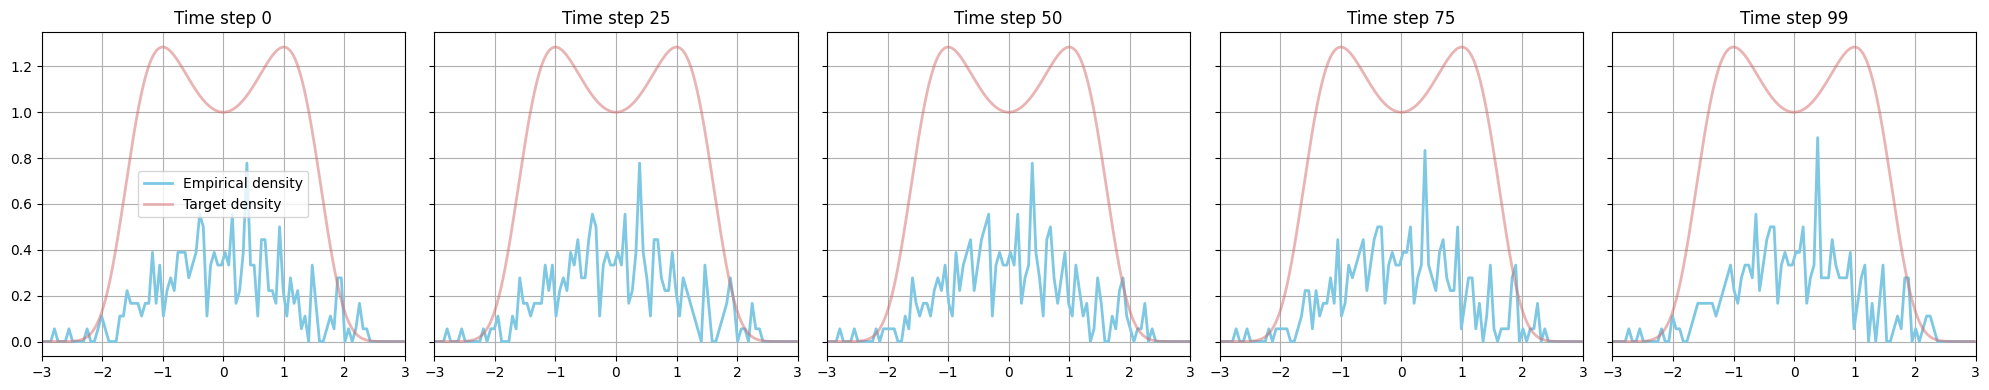

In [94]:
# plotting
x_vals = np.linspace(-3, 3, 500)
true_density = np.exp(-V(x_vals))

fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
for ax, step, part in zip(axes, frames, saved_frames):
    # empirical density using hist
    hist_vals, bin_edges = np.histogram(part.flatten(), bins=100, range=(-3, 3), density=True)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    ax.plot(bin_centers, hist_vals, color='#7EC8E3', lw=2, label='Empirical density')
    ax.plot(x_vals, true_density, color='#D46A6A', lw=2, alpha=0.5, label='Target density')
    ax.set_title(f'Time step {step}')
    ax.set_xlim(-3, 3)
    ax.grid(True)

axes[0].legend()
plt.tight_layout()
plt.show()